## <h2><b>Лабораторна робота №2</b> </h2> Зінов'єв Андрій, гр. ФБ-42мп


<b>Частина 1:</b> <i>Зниження розмірності і візуалізація даних. </i>

<p>Використовувався датасет - https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset/data</p>
<p></p>Також, було обрано алгоритм дерева рішень з минулої лабораторної роботи (Лабораторна №1)</p>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np

df_main = pd.read_csv("breast-cancer.csv").drop('id', axis=1)

column_to_drop = ['compactness_se', 'concavity_se', 'area_worst', 'radius_mean', 'concavity_worst', 'radius_worst', 'concavity_mean', 'compactness_mean', 'area_mean', 'area_se']
df_main = df_main.drop(columns=column_to_drop, axis=1)

#  обробка датасету (переведення тексту стовпця в числа)
label_encoder = preprocessing.LabelEncoder()
df_main['diagnosis'] = label_encoder.fit_transform(df_main['diagnosis'])

In [2]:
import warnings

warnings.filterwarnings("ignore")


In [3]:
#  визначаємо дані
X = df_main.drop('diagnosis', axis=1)
y = df_main['diagnosis'].values.reshape(-1)

In [4]:
#  розділяємо на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=69)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
height = 20  # максимальна висота дерева (для даного датасету)

# створюємо класифікатор
clf = DecisionTreeClassifier(criterion='entropy', max_depth=height, min_samples_leaf=1)

# тренеруємо та отримуємо передбачені значення
clf = clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

Відсоток збереження дисперсії на кожний компонент:  [0.41926845 0.15931129]
Загальна кількість %:  0.5785797330192148


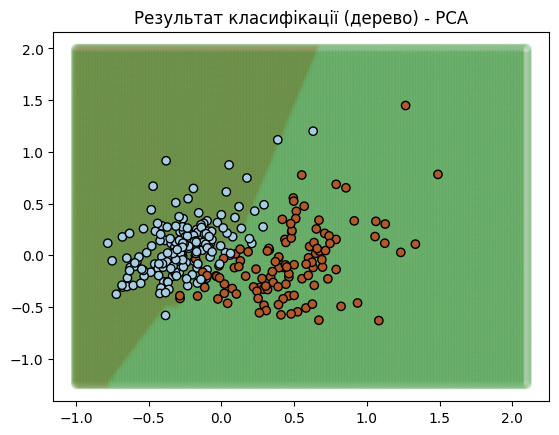

In [6]:
from sklearn.decomposition import PCA
#  за допомогою PCA понижуємо розмірність таблиці до 2
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X_train)
x_pca_test = pca.transform(X_test)

# Explained variance ratios to check the amount of variance retained by PCA
variance_ratios = pca.explained_variance_ratio_


# Print explained variance ratios
print("Відсоток збереження дисперсії на кожний компонент: ", variance_ratios)
print("Загальна кількість %: ", sum(variance_ratios))


#  створюємо площину (сітку) майбутнього графіку
plane = []
for i in np.linspace(-1, 2.1, 300):
    for j in np.linspace(-1.25, 2, 300):
        plane.append([i, j])
plane = np.array(plane)

#  підвищуємо до початкової розмірності
pca_inv = pca.inverse_transform(plane)
y_predict = clf.predict(pca_inv)

#  будуємо графік
plt.scatter(plane[:, 0], plane[:, 1], c=y_predict, edgecolors='green', cmap=plt.cm.Pastel1, alpha=0.1)
plt.scatter(x_pca_test[:, 0], x_pca_test[:, 1], c=y_test, edgecolors='black', cmap=plt.cm.Paired)
plt.title('Результат класифікації (дерево) - PCA')
plt.show()

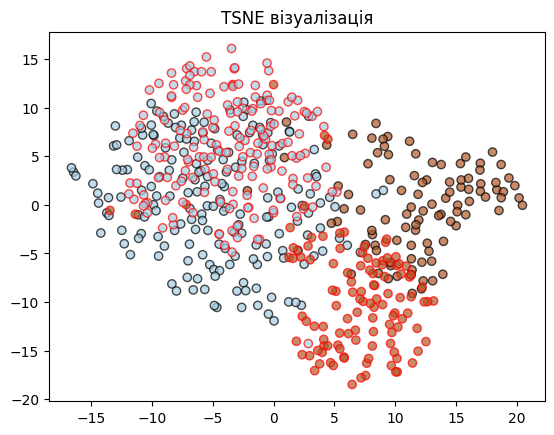

In [7]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

#  за допомогою TSNE понижуємо розмірність таблиці до 2
tsne = TSNE(n_components=2, learning_rate=10, random_state=42, metric='manhattan')
x_tsne = tsne.fit_transform(X_train)
x_tsne_test = tsne.fit_transform(X_test)

# будуємо графік
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='black', alpha=0.7)
plt.scatter(x_tsne_test[:, 0], x_tsne_test[:, 1], c=y_test, cmap=plt.cm.Paired, edgecolors='red', alpha=0.7)

plt.title('TSNE візуалізація')
plt.show()



<b>Частина 2:</b> <i>Кластерний аналіз.</i>

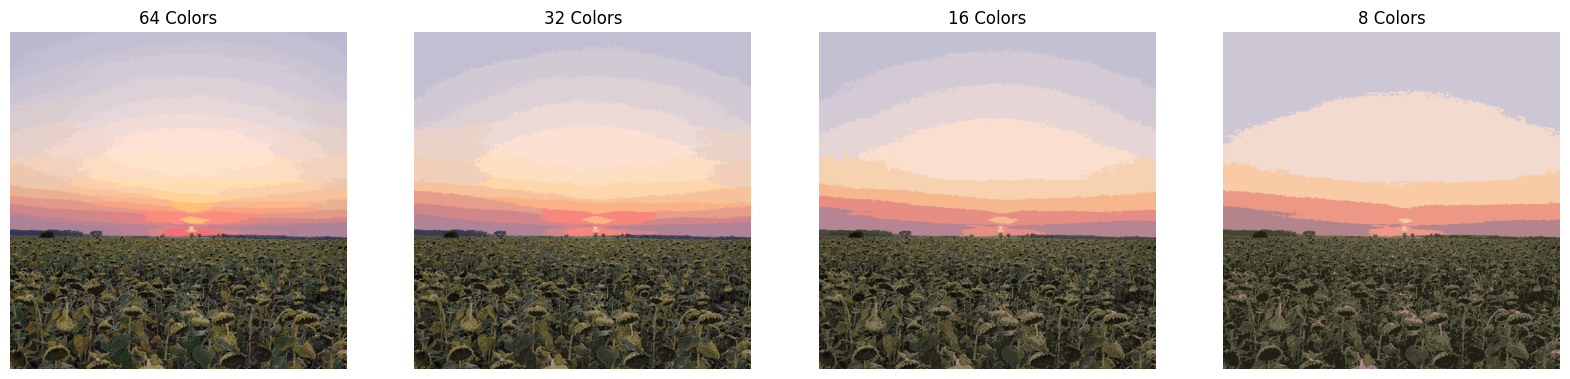

In [8]:
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def compress_img(image, n_colors):
    kmeans = KMeans(n_clusters=n_colors)
    kmeans.fit(image.reshape((-1, 3)))
    new_colors = kmeans.cluster_centers_.astype(int)
    labels = kmeans.labels_
    return new_colors[labels].reshape(image.shape)


img = cv2.imread('pic.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

resolutions = [64, 32, 16, 8]
axes = plt.subplots(1, len(resolutions), figsize=(20, 10))[1]

for i in range(len(resolutions)):
    res_i = resolutions[i]
    quantized_image = compress_img(img_rgb, res_i)
    axes[i].imshow(quantized_image)
    axes[i].set_title(f'{res_i} Colors')
    axes[i].axis('off')

plt.show()


<b>Частина 3:</b> <i>Обробка та класифікація текстових даних.</i>

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\azin0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


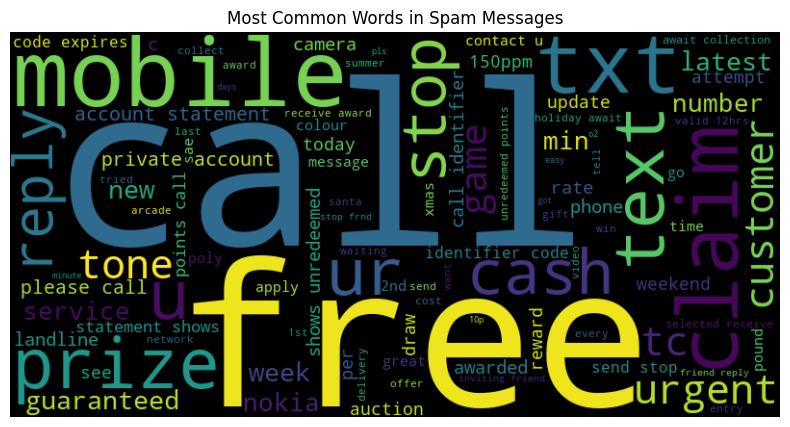

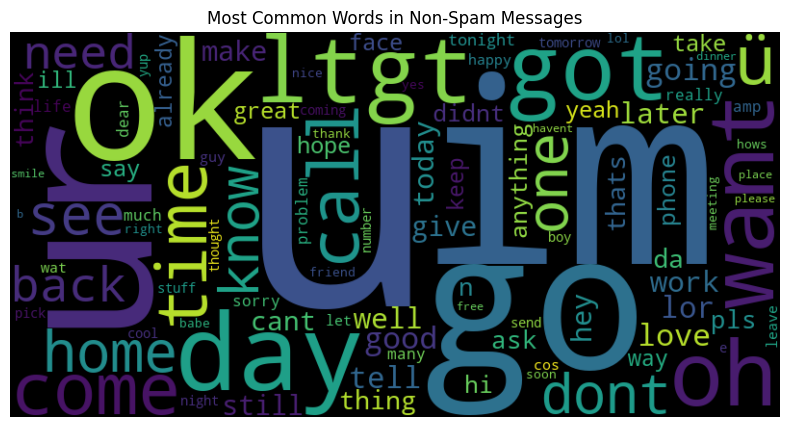

Точність: 0.656
              precision    recall  f1-score   support

           0       0.53      1.00      0.70        49
           1       1.00      0.43      0.61        76

    accuracy                           0.66       125
   macro avg       0.77      0.72      0.65       125
weighted avg       0.82      0.66      0.64       125

Матриця помилок: 
 [[49  0]
 [43 33]]


In [9]:
import pandas as pd
import numpy as np
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn import metrics

# Завантажте набори даних
train_df = pd.read_csv('SMS_train.csv', encoding='ISO-8859-1')
test_df = pd.read_csv('SMS_test.csv', encoding='ISO-8859-1')

# Передобробка тексту (видалення стоп-слів, пунктуації)
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()  # convert to lowercase
    text = ''.join([char for char in text if char not in string.punctuation])  # remove punctuation
    text = ' '.join([word for word in text.split() if word not in stop_words])  # remove stopwords
    return text

# Застосування передобробки до train та test наборів
train_df['cleaned_text'] = train_df['Message_body'].apply(preprocess_text)
test_df['cleaned_text'] = test_df['Message_body'].apply(preprocess_text)

# Візуалізація за допомогою WordCloud (тільки для тренувальних даних)
spam_text = ' '.join(train_df[train_df['Label'] == 'Spam']['cleaned_text'])
non_spam_text = ' '.join(train_df[train_df['Label'] == 'Non-Spam']['cleaned_text'])

wordcloud_spam = WordCloud(width=800, height=400, max_words=100).generate(spam_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis('off')
plt.title('Найпоширеніші слова спаму')
plt.show()

wordcloud_non_spam = WordCloud(width=800, height=400, max_words=100).generate(non_spam_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_non_spam, interpolation='bilinear')
plt.axis('off')
plt.title('Найпоширеніші слова не спаму')
plt.show()

# Векторизація текстів з використанням TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
X_train = tfidf.fit_transform(train_df['cleaned_text'])
X_test = tfidf.transform(test_df['cleaned_text'])

# Перетворення міток у числовий формат
train_df['Label'] = train_df['Label'].map({'Spam': 1, 'Non-Spam': 0})
test_df['Label'] = test_df['Label'].map({'Spam': 1, 'Non-Spam': 0})

y_train = train_df['Label']
y_test = test_df['Label']

# Побудова моделі та оцінка якості
model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Оцінка результатів
print("Точність:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Матриця помилок: \n", metrics.confusion_matrix(y_test, y_pred))